# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

200


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


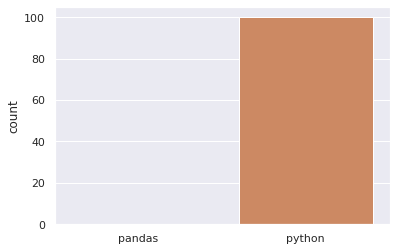

In [2]:
import os
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

import tweepy
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
access_token = os.environ.get('ACCESS_TOKEN')
access_token_secret = os.environ.get('ACCESS_TOKEN_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')

#print(consumer_key)
# your app code here

client = tweepy.Client(bearer_token=bearer_token,
                        consumer_key=consumer_key,
                        consumer_secret=consumer_secret,
                        access_token=access_token,
                        access_token_secret=access_token_secret,
                        return_type=requests.Response,
                        wait_on_rate_limit=True
                        )

#Make a query: Search tweets that have the hashtag #100daysofcode and the word python or pandas, from the last 7 days (search_recent_tweets)
query = '#100daysofcode (pandas OR python) -is:retweet' #hashtag a buscar

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

print(tweets.status_code)

tweets_json = tweets.json()

#llevo este json a un diccionario / dataframe
#print(tweets_json)
#print(type(tweets_json))

tweets_data = tweets_json['data'] 

#lo parseamos(normalizamos) y armo el dataframe
df = pd.json_normalize(tweets_data) 

#print(df)
#lo guardo
df.to_csv("../data/tweets.csv")

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

[pandas, python] = [0, 0]

for index, row in df.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

 
sns.set(color_codes=True)
 
cd = ['pandas', 'python']

# Plot 
ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="count")
plt.show()